# Flute Frequency and Temperature Lab

## Notes

There are three types of samples, each with two trials ($t_n$) where I played a G4 on the flute:
- roomtemp: flute is measured at room temperature
- chilled: flute is put in fridge at 36F for 30 minutes
- frozen: flute is put in fridge at 36F for 2 hours

Crests are being defined as the point in each period with the greatest y-value.

Average period for each wave is being calculated as
$$
\frac{x_{c_n} - x_{c_1}}{n}
$$
where:
$x{c_n}$ is the x-value of the last crest
$x_{c_1}$ is the x-value of the first crest
$n$ is the number of crests.

Sources of uncertainty:
- Error from average period calculation: $\frac{{\delta}t}{N}$:
$$
\frac{{\delta}t}{N}
= \frac{0.02}{4}
= 0.005
$$
- Human error: I blew into the flute
- Fridge might not cool to exactly 36F?? error of $\pm{0.5}$

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [109]:
# Helper functions

def get_crests(df):
    points = df['Recording (a.u.)'].tolist() # Store a list of the points from the sample.
    crests = []
    ends_of_cycles = []

    for index, point in enumerate(points): # Go through each point one by one
        try:
            if point > 0 and points[index+1] < 0:
                ends_of_cycles.append(index)
        except IndexError:
            pass


    cycles = [sl.tolist() for sl in np.split(points, ends_of_cycles)][:-1]
    for cycle in cycles:
        crests.append(max(cycle))
    return crests

def less_lossy_avg_period(df, crests):
    first_crest_row = df.loc[df['Recording (a.u.)'] == crests[0]]
    first_crest_time = first_crest_row['Time (ms)'].values[0]

    last_crest_row = df.loc[df['Recording (a.u.)'] == crests[-1]]
    last_crest_time = last_crest_row['Time (ms)'].values[0]

    alt_total = (last_crest_time - first_crest_time) / len(crests) / 1000
    return alt_total

def freq_from_period(p):
    return 1 / p

In [110]:
roomtemp_t1 = pd.read_csv("flute-roomtemp-t1.csv")
roomtemp_t2 = pd.read_csv("flute-roomtemp-t2.csv")
chilled_t1 = pd.read_csv("flute-chilled-t1.csv")
chilled_t2 = pd.read_csv("flute-chilled-t2.csv")
frozen_t1 = pd.read_csv("flute-chilled2-t1.csv")
frozen_t2 = pd.read_csv("flute-chilled2-t2.csv")

print('An example of one data set: trial one at room temperature')
roomtemp_t1

An example of one data set: trial one at room temperature


,Time (ms),Recording (a.u.)
0,0.000000,0.001192
1,0.022677,0.017597
2,0.045353,0.034429
3,0.068030,0.055202
4,0.090706,0.079808
...,...,...
436,9.886996,-0.455506
437,9.909672,-0.450298
438,9.932349,-0.442763
439,9.955026,-0.432837


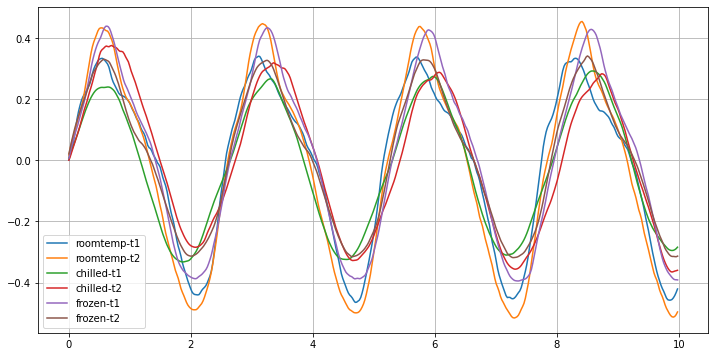

In [111]:
samples = {
    'roomtemp-t1': roomtemp_t1,
    'roomtemp-t2': roomtemp_t2,
    'chilled-t1': chilled_t1,
    'chilled-t2': chilled_t2,
    'frozen-t1': frozen_t1,
    'frozen-t2': frozen_t2
}

fig = plt.figure(figsize=[12,6])

for frame in samples.keys():
    fr = samples[frame]
    plt.plot(fr['Time (ms)'], fr['Recording (a.u.)'])

plt.legend(samples.keys())
plt.grid(visible=True)
plt.show()

# chilled_t2.plot(
#     x="Time (ms)",
#     y="Recording (a.u.)",
#     grid=True
# )

Frequency of roomtemp-t1: 515.7699362047433
Frequency of roomtemp-t2: 508.33809271883473
Frequency of chilled-t1: 503.98090909702506
Frequency of chilled-t2: 498.286209521501
Frequency of frozen-t1: 503.9179193743498
Frequency of frozen-t2: 505.24401913003356


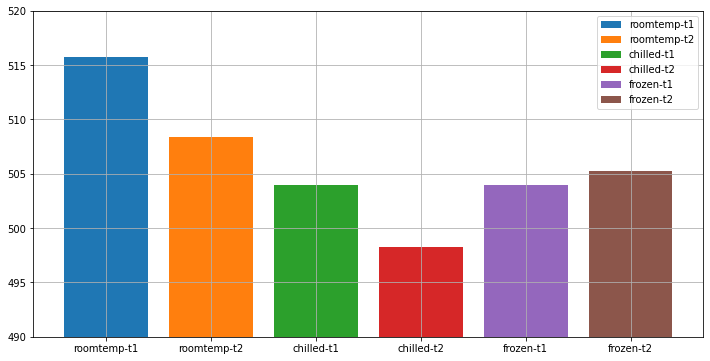

In [126]:
# Getting the frequencies using average periods for each wave:

freqs = {}

for item in samples.keys():
    fr = samples[item]
    c = get_crests(fr)
    p = less_lossy_avg_period(fr, c)
    # print(f'Avg period of {item}: {p}')
    f = freq_from_period(p)
    print(f'Frequency of {item}: {f}')
    freqs[item] = f

fig = plt.figure(figsize=[12,6])

for item in freqs.keys():
    plt.bar(item, freqs[item])

plt.legend(samples.keys())
plt.grid(visible=True)
plt.ylim(490, 520)
plt.show()

In [113]:
maxfreq = max(freqs.items(), key=lambda k: k[1])
minfreq = min(freqs.items(), key=lambda k: k[1])
print('Max frequency:')
print(maxfreq)
print('Min frequency:')
print(minfreq)

Max frequency:
('roomtemp-t1', 515.7699362047433)
Min frequency:
('chilled-t2', 498.286209521501)


In [114]:
avg_roomtemp = (freqs['roomtemp-t1'] + freqs['roomtemp-t2']) / 2
print(f'Frequency of average roomtemp sample: {avg_roomtemp}')
avg_chilled = (freqs['chilled-t1'] + freqs['chilled-t2']) / 2
print(f'Frequency of average chilled sample: {avg_chilled}')
avg_frozen = (freqs['frozen-t1'] + freqs['frozen-t2']) / 2
print(f'Frequency of average frozen sample: {avg_frozen}')

Frequency of average roomtemp sample: 512.054014461789
Frequency of average chilled sample: 501.13355930926303
Frequency of average frozen sample: 504.5809692521917


### Todo
- [ ] calculate uncertainty of each average as percentage (error/original sample)
- [ ] calculate stdev of each average frequency as percentage (stdev/original sample)